Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Class
0    284315
1       492
Name: count, dtype: int64


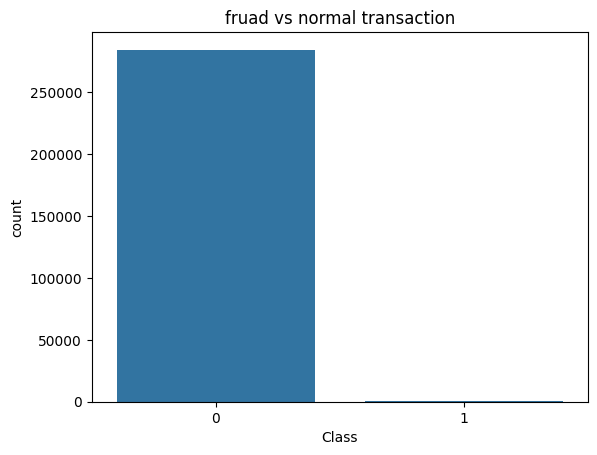

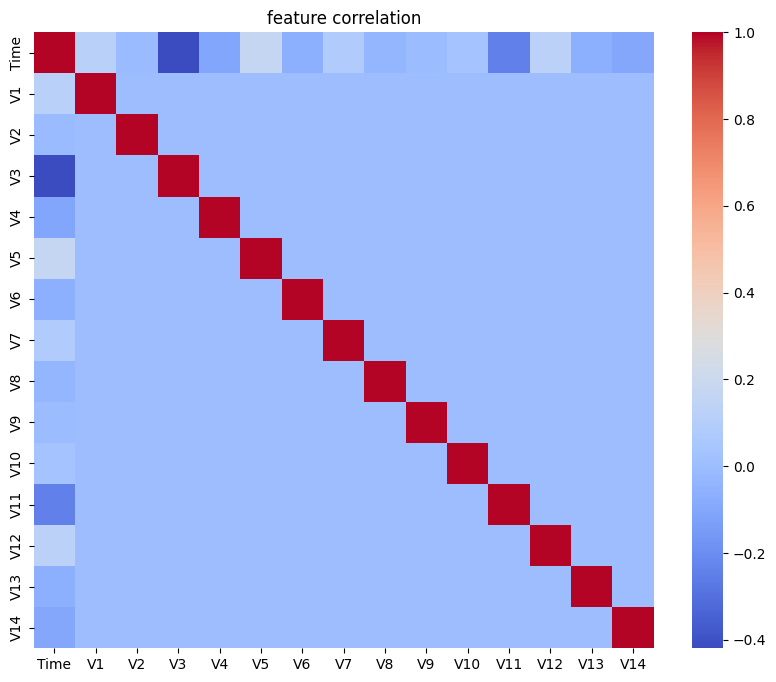

heatmap completed
Class
0    284315
1    284315
Name: count, dtype: int64
[[85135    14]
 [    0 85440]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

AUC_score:0.9999177911660736


In [1]:
import pandas as pd

# Load data
df = pd.read_csv('creditcard.csv')

# Check for missing values
print(df.isnull().sum())

# Check class distribution
print(df['Class'].value_counts())



import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="Class",data=df)
plt.title("fruad vs normal transaction")
plt.show()
plt.figure(figsize=(10,8))
sns.heatmap(df.corr().iloc[:15, :15],cmap="coolwarm",annot=False)
plt.title("feature correlation")
plt.show()
print("heatmap completed")

from imblearn.over_sampling import SMOTE
X =df.drop("Class",axis=1)
y=df["Class"]
smote = SMOTE(random_state=42)
X_res,y_res=smote.fit_resample(X,y)
print(y_res.value_counts())


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.3,random_state=42)

model=RandomForestClassifier()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred)) 


from sklearn.metrics import roc_auc_score,roc_curve
roc_score=roc_auc_score(y_test,y_pred)
print(f"AUC_score:{roc_score}")